


Data Frame contains data for 2 years: 1960 and 2013.

Here are columns of final dataframe:

* Country_Name - Country
* Regions_2012_Dataset - Regions
* Internet_users - percentage
* Income_Group - category
* Life_Expectancy_At_Birth_1960 - life expectancy over entire population, 1960
* Life_Expectancy_At_Birth_2013	- life expectancy over entire population, 2013
* Birth_rate - birth per 1,000 over population
* Estimated_TFR_2013 - total fertility rate, 2013 - result of feature engineering
* Estimated_TFR_1960 - total fertility rate, 1960 - result of feature engineering

We are:
* packing lists and CVS sources into dataframes;
* merging dataframes (sql style)
* re-order columns
* perform feature engineering

Build plots... explore cases

In [266]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns


In [267]:
# Data Source
Country_Code = list (["ABW","AFG","AGO","ALB","ARE","ARG","ARM","ATG","AUS","AUT","AZE","BDI","BEL","BEN","BFA","BGD","BGR","BHR","BHS","BIH","BLR","BLZ","BOL","BRA","BRB","BRN","BTN","BWA","CAF","CAN","CHE","CHL","CHN","CIV","CMR","COG","COL","COM","CPV","CRI","CUB","CYP","CZE","DEU","DJI","DNK","DOM","DZA","ECU","EGY","ERI","ESP","EST","ETH","FIN","FJI","FRA","FSM","GAB","GBR","GEO","GHA","GIN","GMB","GNB","GNQ","GRC","GRD","GTM","GUM","GUY","HKG","HND","HRV","HTI","HUN","IDN","IND","IRL","IRN","IRQ","ISL","ITA","JAM","JOR","JPN","KAZ","KEN","KGZ","KHM","KIR","KOR","KWT","LAO","LBN","LBR","LBY","LCA","LKA","LSO","LTU","LUX","LVA","MAC","MAR","MDA","MDG","MDV","MEX","MKD","MLI","MLT","MMR","MNE","MNG","MOZ","MRT","MUS","MWI","MYS","NAM","NCL","NER","NGA","NIC","NLD","NOR","NPL","NZL","OMN","PAK","PAN","PER","PHL","PNG","POL","PRI","PRT","PRY","PYF","QAT","ROU","RUS","RWA","SAU","SDN","SEN","SGP","SLB","SLE","SLV","SOM","SSD","STP","SUR","SVK","SVN","SWE","SWZ","SYR","TCD","TGO","THA","TJK","TKM","TLS","TON","TTO","TUN","TUR","TZA","UGA","UKR","URY","USA","UZB","VCT","VEN","VIR","VNM","VUT","WSM","YEM","ZAF","COD","ZMB","ZWE"])
Life_Expectancy_At_Birth_1960 = list ([65.5693658536586,32.328512195122,32.9848292682927,62.2543658536585,52.2432195121951,65.2155365853659,65.8634634146342,61.7827317073171,70.8170731707317,68.5856097560976,60.836243902439,41.2360487804878,69.7019512195122,37.2782682926829,34.4779024390244,45.8293170731707,69.2475609756098,52.0893658536585,62.7290487804878,60.2762195121951,67.7080975609756,59.9613658536585,42.1183170731707,54.2054634146342,60.7380487804878,62.5003658536585,32.3593658536585,50.5477317073171,36.4826341463415,71.1331707317073,71.3134146341463,57.4582926829268,43.4658048780488,36.8724146341463,41.523756097561,48.5816341463415,56.716756097561,41.4424390243903,48.8564146341463,60.5761951219512,63.9046585365854,69.5939268292683,70.3487804878049,69.3129512195122,44.0212682926829,72.1765853658537,51.8452682926829,46.1351219512195,53.215,48.0137073170732,37.3629024390244,69.1092682926829,67.9059756097561,38.4057073170732,68.819756097561,55.9584878048781,69.8682926829268,57.5865853658537,39.5701219512195,71.1268292682927,63.4318536585366,45.8314634146342,34.8863902439024,32.0422195121951,37.8404390243902,36.7330487804878,68.1639024390244,59.8159268292683,45.5316341463415,61.2263414634146,60.2787317073171,66.9997073170732,46.2883170731707,64.6086585365854,42.1000975609756,68.0031707317073,48.6403170731707,41.1719512195122,69.691756097561,44.945512195122,48.0306829268293,73.4286585365854,69.1239024390244,64.1918292682927,52.6852682926829,67.6660975609756,58.3675853658537,46.3624146341463,56.1280731707317,41.2320243902439,49.2159756097561,53.0013170731707,60.3479512195122,43.2044634146342,63.2801219512195,34.7831707317073,42.6411951219512,57.303756097561,59.7471463414634,46.5107073170732,69.8473170731707,68.4463902439024,69.7868292682927,64.6609268292683,48.4466341463415,61.8127804878049,39.9746829268293,37.2686341463415,57.0656341463415,60.6228048780488,28.2116097560976,67.6017804878049,42.7363902439024,63.7056097560976,48.3688048780488,35.0037073170732,43.4830975609756,58.7452195121951,37.7736341463415,59.4753414634146,46.8803902439024,58.6390243902439,35.5150487804878,37.1829512195122,46.9988292682927,73.3926829268293,73.549756097561,35.1708292682927,71.2365853658537,42.6670731707317,45.2904634146342,60.8817073170732,47.6915853658537,57.8119268292683,38.462243902439,67.6804878048781,68.7196097560976,62.8089268292683,63.7937073170732,56.3570487804878,61.2060731707317,65.6424390243903,66.0552926829268,42.2492926829268,45.6662682926829,48.1876341463415,38.206,65.6598292682927,49.3817073170732,30.3315365853659,49.9479268292683,36.9658780487805,31.6767073170732,50.4513658536585,59.6801219512195,69.9759268292683,68.9780487804878,73.0056097560976,44.2337804878049,52.768243902439,38.0161219512195,40.2728292682927,54.6993170731707,56.1535365853659,54.4586829268293,33.7271219512195,61.3645365853659,62.6575853658537,42.009756097561,45.3844146341463,43.6538780487805,43.9835609756098,68.2995365853659,67.8963902439025,69.7707317073171,58.8855365853659,57.7238780487805,59.2851219512195,63.7302195121951,59.0670243902439,46.4874878048781,49.969512195122,34.3638048780488,49.0362926829268,41.0180487804878,45.1098048780488,51.5424634146342])
Life_Expectancy_At_Birth_2013 = list ([75.3286585365854,60.0282682926829,51.8661707317073,77.537243902439,77.1956341463415,75.9860975609756,74.5613658536585,75.7786585365854,82.1975609756098,80.890243902439,70.6931463414634,56.2516097560976,80.3853658536585,59.3120243902439,58.2406341463415,71.245243902439,74.4658536585366,76.5459512195122,75.0735365853659,76.2769268292683,72.4707317073171,69.9820487804878,67.9134390243903,74.1224390243903,75.3339512195122,78.5466585365854,69.1029268292683,64.3608048780488,49.8798780487805,81.4011219512195,82.7487804878049,81.1979268292683,75.3530243902439,51.2084634146342,55.0418048780488,61.6663902439024,73.8097317073171,62.9321707317073,72.9723658536585,79.2252195121951,79.2563902439025,79.9497804878049,78.2780487804878,81.0439024390244,61.6864634146342,80.3024390243903,73.3199024390244,74.5689512195122,75.648512195122,70.9257804878049,63.1778780487805,82.4268292682927,76.4243902439025,63.4421951219512,80.8317073170732,69.9179268292683,81.9682926829268,68.9733902439024,63.8435853658537,80.9560975609756,74.079512195122,61.1420731707317,58.216487804878,59.9992682926829,54.8384146341464,57.2908292682927,80.6341463414634,73.1935609756098,71.4863902439024,78.872512195122,66.3100243902439,83.8317073170732,72.9428536585366,77.1268292682927,62.4011463414634,75.2682926829268,68.7046097560976,67.6604146341463,81.0439024390244,75.1259756097561,69.4716829268293,83.1170731707317,82.290243902439,73.4689268292683,73.9014146341463,83.3319512195122,70.45,60.9537804878049,70.2024390243902,67.7720487804878,65.7665853658537,81.459756097561,74.462756097561,65.687243902439,80.1288780487805,60.5203902439024,71.6576829268293,74.9127073170732,74.2402926829268,49.3314634146342,74.1634146341464,81.7975609756098,73.9804878048781,80.3391463414634,73.7090487804878,68.811512195122,64.6739024390244,76.6026097560976,76.5326585365854,75.1870487804878,57.5351951219512,80.7463414634146,65.6540975609756,74.7583658536585,69.0618048780488,54.641512195122,62.8027073170732,74.46,61.466,74.567512195122,64.3438780487805,77.1219512195122,60.8281463414634,52.4421463414634,74.514756097561,81.1048780487805,81.4512195121951,69.222,81.4073170731707,76.8410487804878,65.9636829268293,77.4192195121951,74.2838536585366,68.1315609756097,62.4491707317073,76.8487804878049,78.7111951219512,80.3731707317073,72.7991707317073,76.3340731707317,78.4184878048781,74.4634146341463,71.0731707317073,63.3948292682927,74.1776341463415,63.1670487804878,65.878756097561,82.3463414634146,67.7189268292683,50.3631219512195,72.4981463414634,55.0230243902439,55.2209024390244,66.259512195122,70.99,76.2609756097561,80.2780487804878,81.7048780487805,48.9379268292683,74.7157804878049,51.1914878048781,59.1323658536585,74.2469268292683,69.4001707317073,65.4565609756098,67.5223658536585,72.6403414634147,70.3052926829268,73.6463414634147,75.1759512195122,64.2918292682927,57.7676829268293,71.159512195122,76.8361951219512,78.8414634146341,68.2275853658537,72.8108780487805,74.0744146341464,79.6243902439024,75.756487804878,71.669243902439,73.2503902439024,63.583512195122,56.7365853658537,58.2719268292683,59.2373658536585,55.633])

# Data Source
Countries_2012_Dataset = list (["Aruba","Afghanistan","Angola","Albania","United Arab Emirates","Argentina","Armenia","Antigua and Barbuda","Australia","Austria","Azerbaijan","Burundi","Belgium","Benin","Burkina Faso","Bangladesh","Bulgaria","Bahrain","Bahamas, The","Bosnia and Herzegovina","Belarus","Belize","Bermuda","Bolivia","Brazil","Barbados","Brunei Darussalam","Bhutan","Botswana","Central African Republic","Canada","Switzerland","Chile","China","Cote d'Ivoire","Cameroon","Congo, Rep.","Colombia","Comoros","Cabo Verde","Costa Rica","Cuba","Cayman Islands","Cyprus","Czech Republic","Germany","Djibouti","Denmark","Dominican Republic","Algeria","Ecuador","Egypt, Arab Rep.","Eritrea","Spain","Estonia","Ethiopia","Finland","Fiji","France","Micronesia, Fed. Sts.","Gabon","United Kingdom","Georgia","Ghana","Guinea","Gambia, The","Guinea-Bissau","Equatorial Guinea","Greece","Grenada","Greenland","Guatemala","Guam","Guyana","Hong Kong SAR, China","Honduras","Croatia","Haiti","Hungary","Indonesia","India","Ireland","Iran, Islamic Rep.","Iraq","Iceland","Israel","Italy","Jamaica","Jordan","Japan","Kazakhstan","Kenya","Kyrgyz Republic","Cambodia","Kiribati","Korea, Rep.","Kuwait","Lao PDR","Lebanon","Liberia","Libya","St. Lucia","Liechtenstein","Sri Lanka","Lesotho","Lithuania","Luxembourg","Latvia","Macao SAR, China","Morocco","Moldova","Madagascar","Maldives","Mexico","Macedonia, FYR","Mali","Malta","Myanmar","Montenegro","Mongolia","Mozambique","Mauritania","Mauritius","Malawi","Malaysia","Namibia","New Caledonia","Niger","Nigeria","Nicaragua","Netherlands","Norway","Nepal","New Zealand","Oman","Pakistan","Panama","Peru","Philippines","Papua New Guinea","Poland","Puerto Rico","Portugal","Paraguay","French Polynesia","Qatar","Romania","Russian Federation","Rwanda","Saudi Arabia","Sudan","Senegal","Singapore","Solomon Islands","Sierra Leone","El Salvador","Somalia","Serbia","South Sudan","Sao Tome and Principe","Suriname","Slovak Republic","Slovenia","Sweden","Swaziland","Seychelles","Syrian Arab Republic","Chad","Togo","Thailand","Tajikistan","Turkmenistan","Timor-Leste","Tonga","Trinidad and Tobago","Tunisia","Turkey","Tanzania","Uganda","Ukraine","Uruguay","United States","Uzbekistan","St. Vincent and the Grenadines","Venezuela, RB","Virgin Islands (U.S.)","Vietnam","Vanuatu","West Bank and Gaza","Samoa","Yemen, Rep.","South Africa","Congo, Dem. Rep.","Zambia","Zimbabwe"])
Codes_2012_Dataset = list (["ABW","AFG","AGO","ALB","ARE","ARG","ARM","ATG","AUS","AUT","AZE","BDI","BEL","BEN","BFA","BGD","BGR","BHR","BHS","BIH","BLR","BLZ","BMU","BOL","BRA","BRB","BRN","BTN","BWA","CAF","CAN","CHE","CHL","CHN","CIV","CMR","COG","COL","COM","CPV","CRI","CUB","CYM","CYP","CZE","DEU","DJI","DNK","DOM","DZA","ECU","EGY","ERI","ESP","EST","ETH","FIN","FJI","FRA","FSM","GAB","GBR","GEO","GHA","GIN","GMB","GNB","GNQ","GRC","GRD","GRL","GTM","GUM","GUY","HKG","HND","HRV","HTI","HUN","IDN","IND","IRL","IRN","IRQ","ISL","ISR","ITA","JAM","JOR","JPN","KAZ","KEN","KGZ","KHM","KIR","KOR","KWT","LAO","LBN","LBR","LBY","LCA","LIE","LKA","LSO","LTU","LUX","LVA","MAC","MAR","MDA","MDG","MDV","MEX","MKD","MLI","MLT","MMR","MNE","MNG","MOZ","MRT","MUS","MWI","MYS","NAM","NCL","NER","NGA","NIC","NLD","NOR","NPL","NZL","OMN","PAK","PAN","PER","PHL","PNG","POL","PRI","PRT","PRY","PYF","QAT","ROU","RUS","RWA","SAU","SDN","SEN","SGP","SLB","SLE","SLV","SOM","SRB","SSD","STP","SUR","SVK","SVN","SWE","SWZ","SYC","SYR","TCD","TGO","THA","TJK","TKM","TLS","TON","TTO","TUN","TUR","TZA","UGA","UKR","URY","USA","UZB","VCT","VEN","VIR","VNM","VUT","PSE","WSM","YEM","ZAF","COD","ZMB","ZWE"])
Regions_2012_Dataset = list (["The Americas","Asia","Africa","Europe","Middle East","The Americas","Asia","The Americas","Oceania","Europe","Asia","Africa","Europe","Africa","Africa","Asia","Europe","Middle East","The Americas","Europe","Europe","The Americas","The Americas","The Americas","The Americas","The Americas","Asia","Asia","Africa","Africa","The Americas","Europe","The Americas","Asia","Africa","Africa","Africa","The Americas","Africa","Africa","The Americas","The Americas","The Americas","Europe","Europe","Europe","Africa","Europe","The Americas","Africa","The Americas","Africa","Africa","Europe","Europe","Africa","Europe","Oceania","Europe","Oceania","Africa","Europe","Asia","Africa","Africa","Africa","Africa","Africa","Europe","The Americas","The Americas","The Americas","Oceania","The Americas","Asia","The Americas","Europe","The Americas","Europe","Asia","Asia","Europe","Middle East","Middle East","Europe","Middle East","Europe","The Americas","Middle East","Asia","Asia","Africa","Asia","Asia","Oceania","Asia","Middle East","Asia","Middle East","Africa","Africa","The Americas","Europe","Asia","Africa","Europe","Europe","Europe","Asia","Africa","Europe","Africa","Asia","The Americas","Europe","Africa","Europe","Asia","Europe","Asia","Africa","Africa","Africa","Africa","Asia","Africa","Oceania","Africa","Africa","The Americas","Europe","Europe","Asia","Oceania","Middle East","Asia","The Americas","The Americas","Asia","Oceania","Europe","The Americas","Europe","The Americas","Oceania","Middle East","Europe","Europe","Africa","Middle East","Africa","Africa","Asia","Oceania","Africa","The Americas","Africa","Europe","Africa","Africa","The Americas","Europe","Europe","Europe","Africa","Africa","Middle East","Africa","Africa","Asia","Asia","Asia","Asia","Oceania","The Americas","Africa","Europe","Africa","Africa","Europe","The Americas","The Americas","Asia","The Americas","The Americas","The Americas","Asia","Oceania","Middle East","Oceania","Middle East","Africa","Africa","Africa","Africa"])


In [268]:
# import of CSV and packing it into dataframe
df3 = pd.read_csv('data/P4-Demographic-Data.csv')
df = df3.rename(columns={'Country Name': 'Country_Name', 'Country Code': 'Country_Code', 'Birth rate':'Birth_rate', 'Internet users':'Internet_users', 'Income Group': 'Income_Group'}, inplace='True')
df3.head()

,Country_Name,Country_Code,Birth_rate,Internet_users,Income_Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


In [269]:
# Create DataFrame for the first dataset
df1 = pd.DataFrame({
    'Country_Code': Country_Code,
    'Life_Expectancy_At_Birth_1960': Life_Expectancy_At_Birth_1960,
    'Life_Expectancy_At_Birth_2013': Life_Expectancy_At_Birth_2013
})

df1.head()

,Country_Code,Life_Expectancy_At_Birth_1960,Life_Expectancy_At_Birth_2013
0,ABW,65.569366,75.328659
1,AFG,32.328512,60.028268
2,AGO,32.984829,51.866171
3,ALB,62.254366,77.537244
4,ARE,52.243220,77.195634


In [270]:
# Create DataFrame for the second dataset
df2 = pd.DataFrame({
    'Countries_2012_Dataset': Countries_2012_Dataset,
    'Codes_2012_Dataset': Codes_2012_Dataset,
    'Regions_2012_Dataset': Regions_2012_Dataset
})

df2.head()

,Countries_2012_Dataset,Codes_2012_Dataset,Regions_2012_Dataset
0,Aruba,ABW,The Americas
1,Afghanistan,AFG,Asia
2,Angola,AGO,Africa
3,Albania,ALB,Europe
4,United Arab Emirates,ARE,Middle East


In [271]:
# Merging the two DataFrames using an outer join to explore, because number of lines differs and we need to catch them.
merged_df = pd.merge(df1, df2, left_on='Country_Code', right_on='Codes_2012_Dataset', how='outer')

# Display the result
merged_df.head()

,Country_Code,Life_Expectancy_At_Birth_1960,Life_Expectancy_At_Birth_2013,Countries_2012_Dataset,Codes_2012_Dataset,Regions_2012_Dataset
0,ABW,65.569366,75.328659,Aruba,ABW,The Americas
1,AFG,32.328512,60.028268,Afghanistan,AFG,Asia
2,AGO,32.984829,51.866171,Angola,AGO,Africa
3,ALB,62.254366,77.537244,Albania,ALB,Europe
4,ARE,52.243220,77.195634,United Arab Emirates,ARE,Middle East


In [272]:
# save it as cvs file and inspect
merged_df.to_csv('data/merged_df_output.csv', index=False)

# as a result we caught a few empty records, there is no meaningful info.

In [273]:
# Merging the two DataFrames using an inner join, as a result we have a dataframe with all parameters filled, records from the previous step are filtered
merged_df = pd.merge(df1, df2, left_on='Country_Code', right_on='Codes_2012_Dataset', how='inner')

# Display the result
merged_df.head()

,Country_Code,Life_Expectancy_At_Birth_1960,Life_Expectancy_At_Birth_2013,Countries_2012_Dataset,Codes_2012_Dataset,Regions_2012_Dataset
0,ABW,65.569366,75.328659,Aruba,ABW,The Americas
1,AFG,32.328512,60.028268,Afghanistan,AFG,Asia
2,AGO,32.984829,51.866171,Angola,AGO,Africa
3,ALB,62.254366,77.537244,Albania,ALB,Europe
4,ARE,52.243220,77.195634,United Arab Emirates,ARE,Middle East


In [274]:
# let us inspect results in csv file
merged_df.to_csv('data/merged_df_inner_output.csv', index=False)


In [275]:
# everything is fine and we merge the above df with the last one, so we get final dataframe
final_df = pd.merge(merged_df, df3, left_on='Country_Code', right_on='Country_Code', how='inner')
# let us remove duplicated columns 
remove_columns = ['Countries_2012_Dataset', 'Codes_2012_Dataset', 'Country_Code']
final_df = final_df.drop(remove_columns, axis=1)
final_df.head()

# looks good

,Life_Expectancy_At_Birth_1960,Life_Expectancy_At_Birth_2013,Regions_2012_Dataset,Country_Name,Birth_rate,Internet_users,Income_Group
0,65.569366,75.328659,The Americas,Aruba,10.244,78.9,High income
1,32.328512,60.028268,Asia,Afghanistan,35.253,5.9,Low income
2,32.984829,51.866171,Africa,Angola,45.985,19.1,Upper middle income
3,62.254366,77.537244,Europe,Albania,12.877,57.2,Upper middle income
4,52.243220,77.195634,Middle East,United Arab Emirates,11.044,88.0,High income


In [276]:
# And re-order columns so it is more user friendly for exploration 
new_order = ['Country_Name', 'Regions_2012_Dataset', 'Internet_users', 'Income_Group', 'Life_Expectancy_At_Birth_1960', 'Life_Expectancy_At_Birth_2013', 'Birth_rate']

# Re-order columns
final_df = final_df[new_order]
final_df.head()

,Country_Name,Regions_2012_Dataset,Internet_users,Income_Group,Life_Expectancy_At_Birth_1960,Life_Expectancy_At_Birth_2013,Birth_rate
0,Aruba,The Americas,78.9,High income,65.569366,75.328659,10.244
1,Afghanistan,Asia,5.9,Low income,32.328512,60.028268,35.253
2,Angola,Africa,19.1,Upper middle income,32.984829,51.866171,45.985
3,Albania,Europe,57.2,Upper middle income,62.254366,77.537244,12.877
4,United Arab Emirates,Middle East,88.0,High income,52.243220,77.195634,11.044


In [277]:
# Estimate Total Fertility Rate (TFR) per year
final_df['Estimated_TFR_2013'] = final_df['Birth_rate'] * (final_df['Life_Expectancy_At_Birth_2013'] / 100)
final_df['Estimated_TFR_1960'] = final_df['Birth_rate'] * (final_df['Life_Expectancy_At_Birth_1960'] / 100)
final_df.head()


,Country_Name,Regions_2012_Dataset,Internet_users,Income_Group,Life_Expectancy_At_Birth_1960,Life_Expectancy_At_Birth_2013,Birth_rate,Estimated_TFR_2013,Estimated_TFR_1960
0,Aruba,The Americas,78.9,High income,65.569366,75.328659,10.244,7.716668,6.716926
1,Afghanistan,Asia,5.9,Low income,32.328512,60.028268,35.253,21.161765,11.396770
2,Angola,Africa,19.1,Upper middle income,32.984829,51.866171,45.985,23.850659,15.168074
3,Albania,Europe,57.2,Upper middle income,62.254366,77.537244,12.877,9.984471,8.016495
4,United Arab Emirates,Middle East,88.0,High income,52.243220,77.195634,11.044,8.525486,5.769741


In [278]:
# let us explore dataframe, we need to check if there NaNs, empty values
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country_Name                   187 non-null    object 
 1   Regions_2012_Dataset           187 non-null    object 
 2   Internet_users                 187 non-null    float64
 3   Income_Group                   187 non-null    object 
 4   Life_Expectancy_At_Birth_1960  187 non-null    float64
 5   Life_Expectancy_At_Birth_2013  187 non-null    float64
 6   Birth_rate                     187 non-null    float64
 7   Estimated_TFR_2013             187 non-null    float64
 8   Estimated_TFR_1960             187 non-null    float64
dtypes: float64(6), object(3)
memory usage: 13.3+ KB


In [279]:
final_df.describe()

,Internet_users,Life_Expectancy_At_Birth_1960,Life_Expectancy_At_Birth_2013,Birth_rate,Estimated_TFR_2013,Estimated_TFR_1960
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,40.944448,53.734112,70.763808,21.714128,14.568222,10.585434
std,28.882503,12.182463,8.590893,10.668159,5.591194,3.400059
min,0.900000,28.211610,48.937927,7.900000,6.349480,4.558113
25%,13.950000,43.474451,64.517354,12.164500,9.372413,7.738924
50%,39.000000,54.699317,73.250390,19.842000,14.151243,10.161406
75%,65.627400,64.048244,76.838622,30.015000,19.385017,13.258099
max,96.546800,73.549756,83.831707,49.661000,30.207866,19.121413


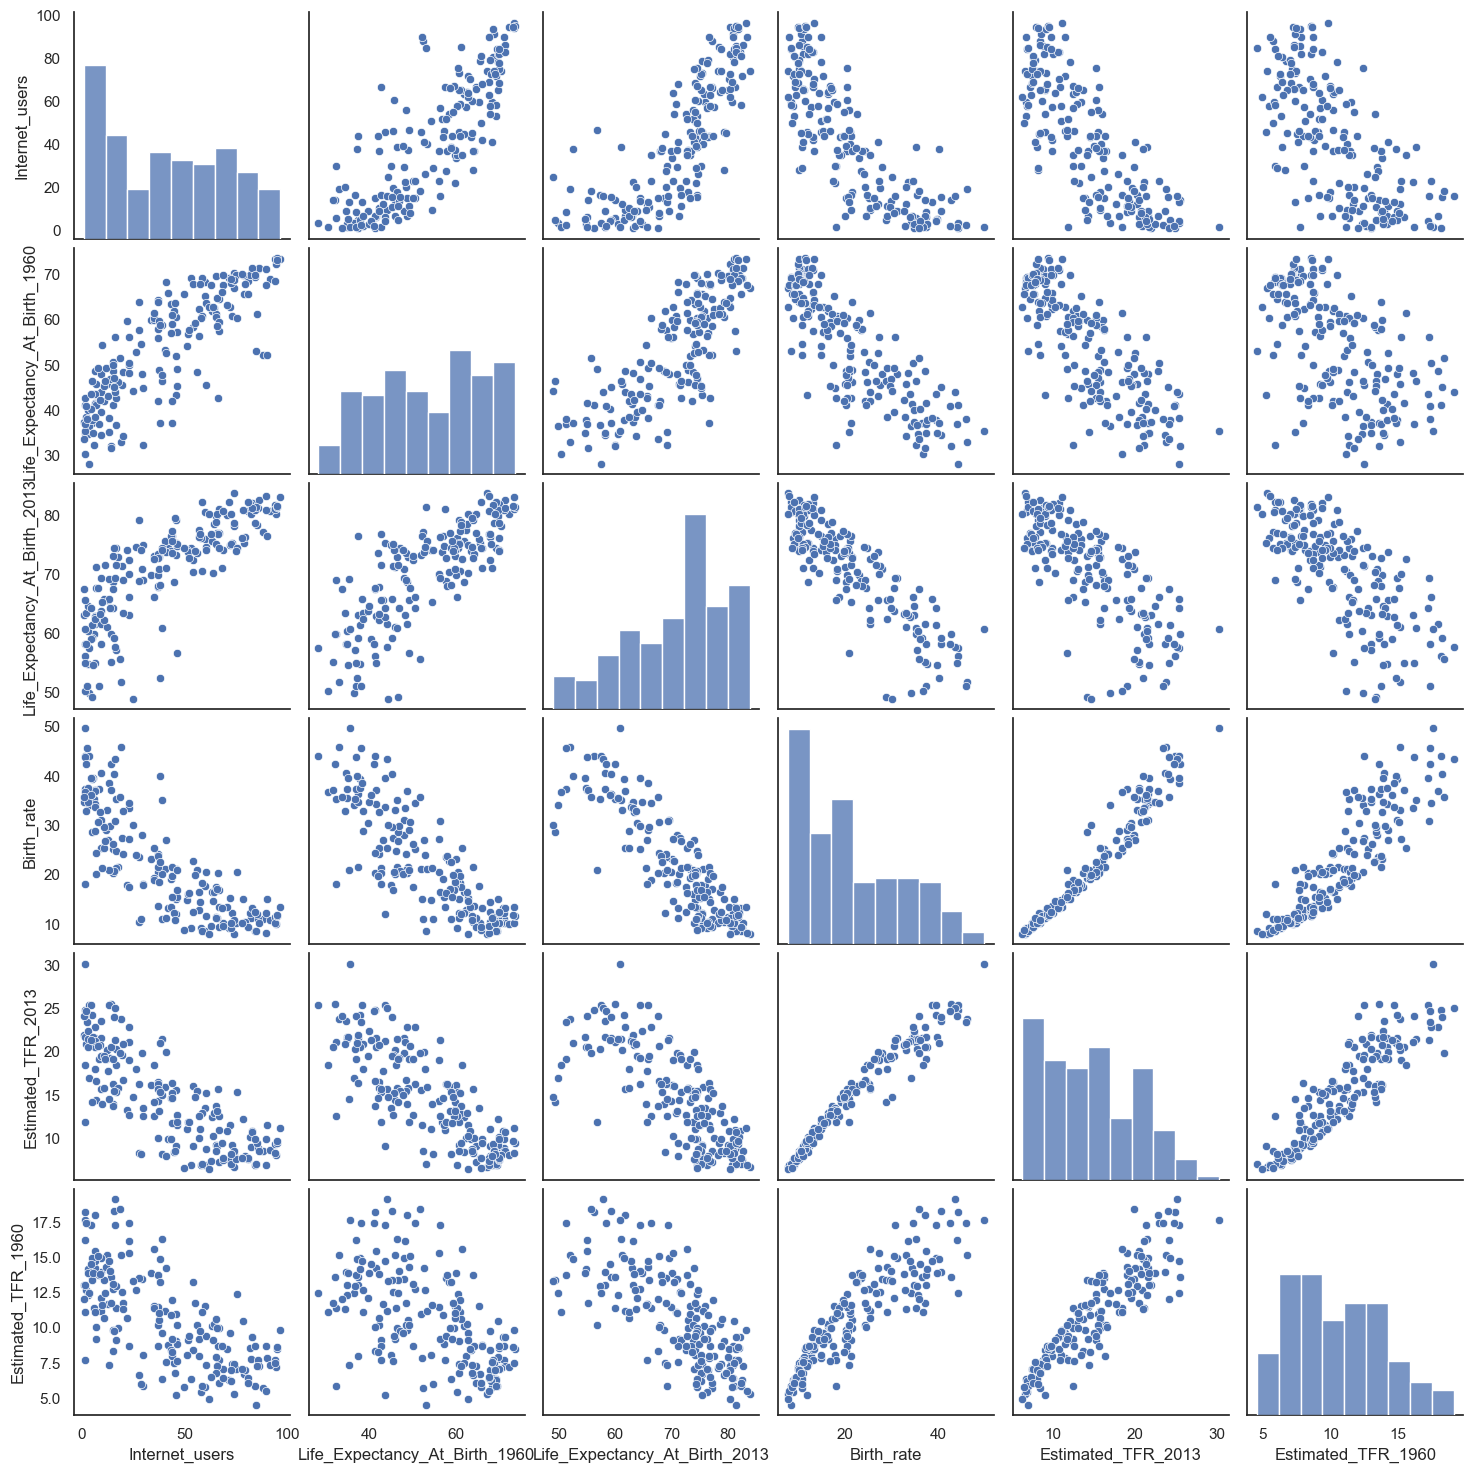

In [280]:
# let us visualize and check 'trends'
sns.pairplot(final_df)
plt.show()


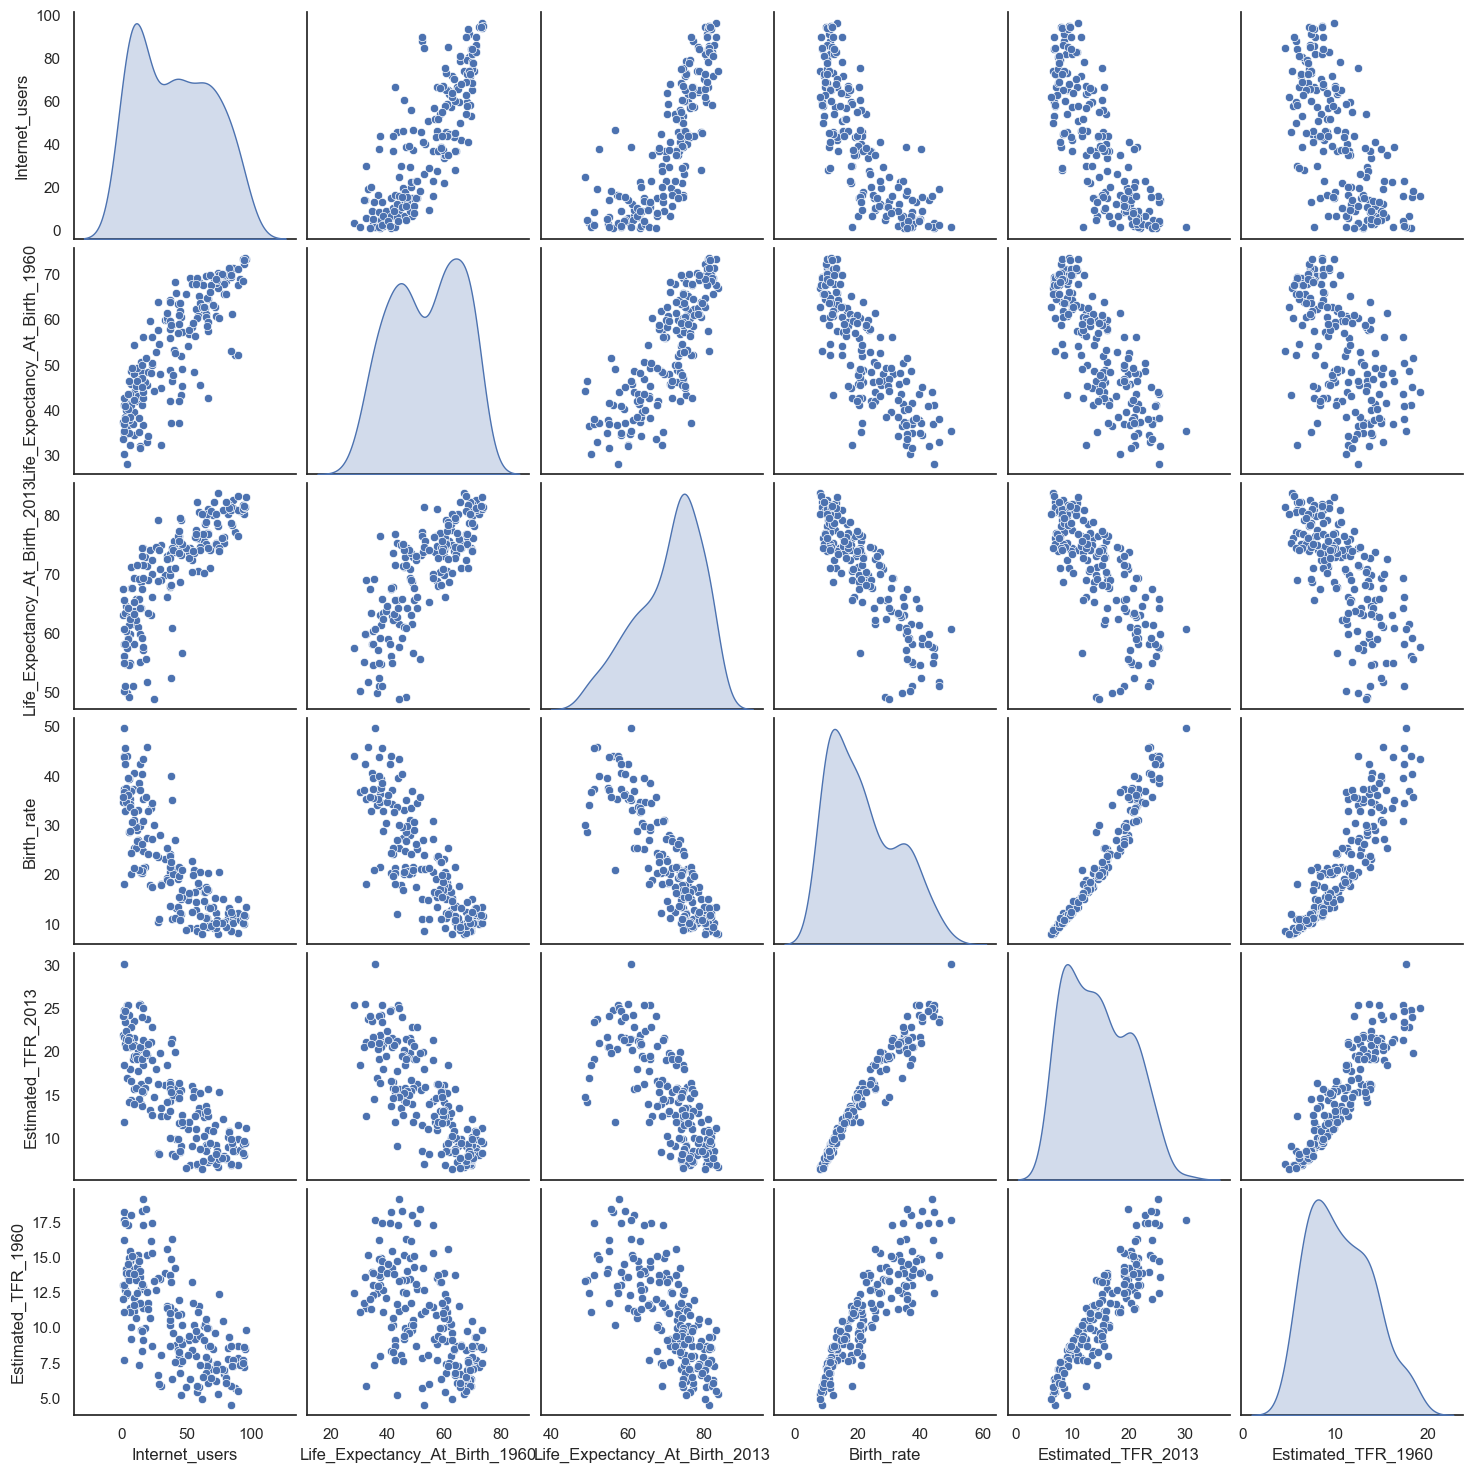

In [281]:
# outliers exploration check diagonal
sns.pairplot(final_df, diag_kind='kde')  # kde for smooth distribution in diagonal plots
plt.show()


We are ready to visualize data: Fertility Rate vs Country over Year


In [282]:
# Reshape the DataFrame using pd.melt() for fertility rate columns
melted_df = pd.melt(final_df, 
                    id_vars=['Country_Name', 'Regions_2012_Dataset'], 
                    value_vars=['Estimated_TFR_1960', 'Estimated_TFR_2013'], 
                    var_name='Year', value_name='Fertility_Rate')

# Replace column names with actual years (1960, 2013)
melted_df['Year'] = melted_df['Year'].replace({'Estimated_TFR_1960': '1960', 'Estimated_TFR_2013': '2013'})

# Sort data by region and fertility rate to better structure the plot
melted_df = melted_df.sort_values(by=['Regions_2012_Dataset', 'Fertility_Rate'])

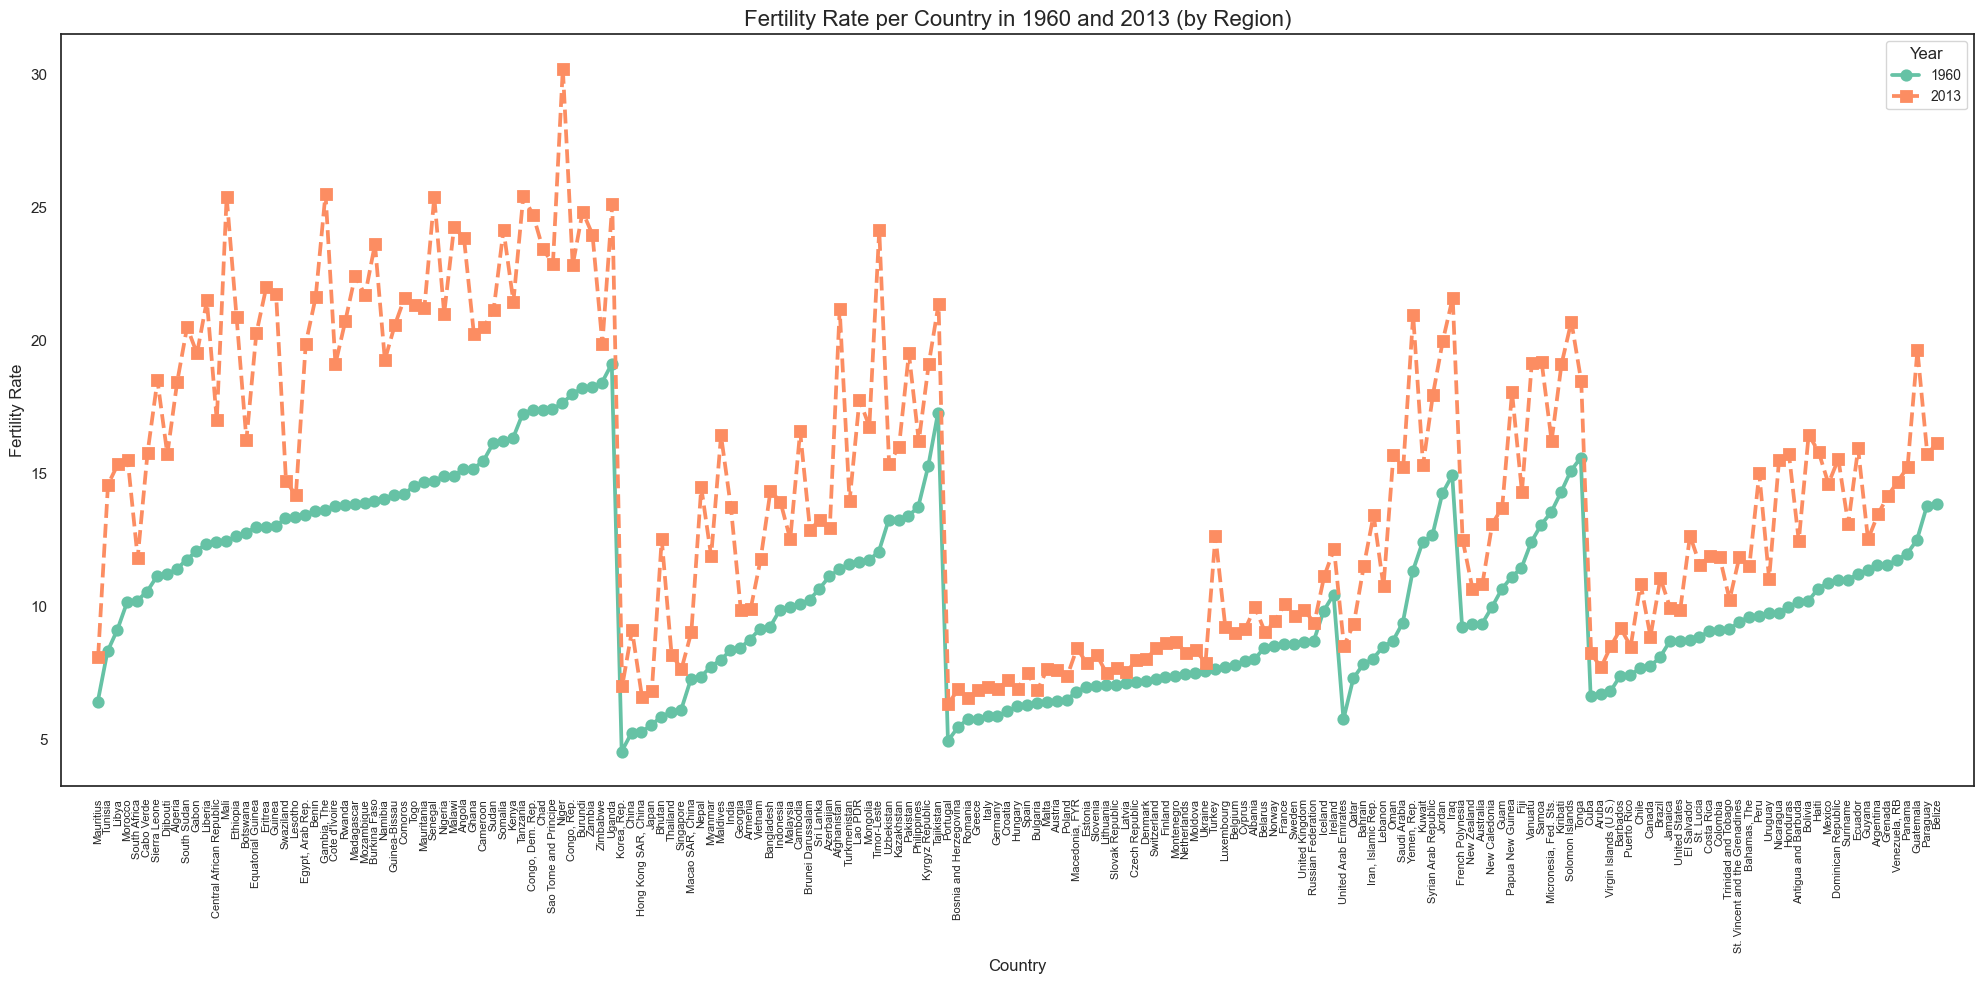

In [283]:
# Set the figure size to make the plot wider
plt.figure(figsize=(20, 10))

# Create a point plot with more space between countries and sorted data
sns.pointplot(x='Country_Name', y='Fertility_Rate', hue='Year', data=melted_df, 
              dodge=True, palette='Set2', markers=["o", "s"], linestyles=["-", "--"])

# Rotate the x-axis labels to avoid overlap and specify font
plt.xticks(rotation=90, fontsize=8)

# Set plot labels and title
plt.title('Fertility Rate per Country in 1960 and 2013 (by Region)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Fertility Rate', fontsize=12)

# Add more space between labels by adjusting margins
plt.gca().margins(x=0.02)

# Add a legend for the years
plt.legend(title='Year', fontsize=10)

# Display the plot
plt.tight_layout()  # Ensures everything fits within the figure area
plt.show()


We are ready to visualize data: Fertility Rate vs Region over Year


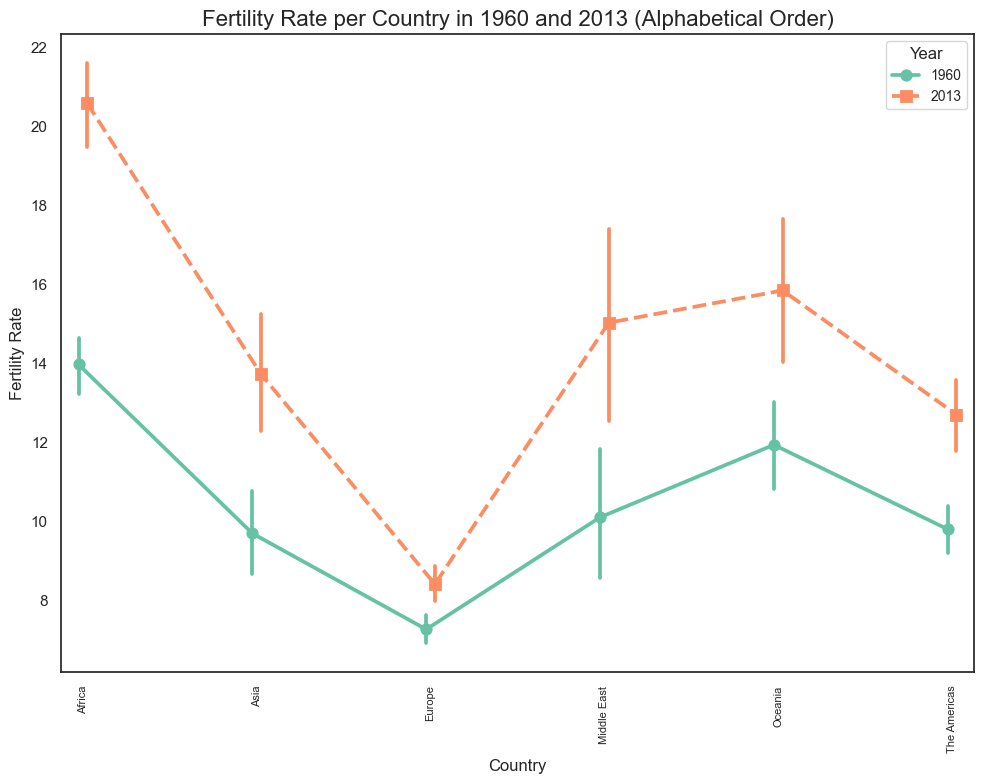

In [284]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Create a point plot, explicitly ordering the x-axis alphabetically by 'Country_Name'
sns.pointplot(x='Regions_2012_Dataset', y='Fertility_Rate', hue='Year', data=melted_df, 
              order=sorted(melted_df['Regions_2012_Dataset'].unique()), dodge=True, 
              palette='Set2', markers=["o", "s"], linestyles=["-", "--"])

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=90, fontsize=8)

# Set plot labels and title
plt.title('Fertility Rate per Country in 1960 and 2013 (Alphabetical Order)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Fertility Rate', fontsize=12)

# Add more space between labels by adjusting margins
plt.gca().margins(x=0.02)

# Add a legend for the years
plt.legend(title='Year', fontsize=10)

# Display the plot
plt.tight_layout()  # Ensures everything fits within the figure area
plt.show()


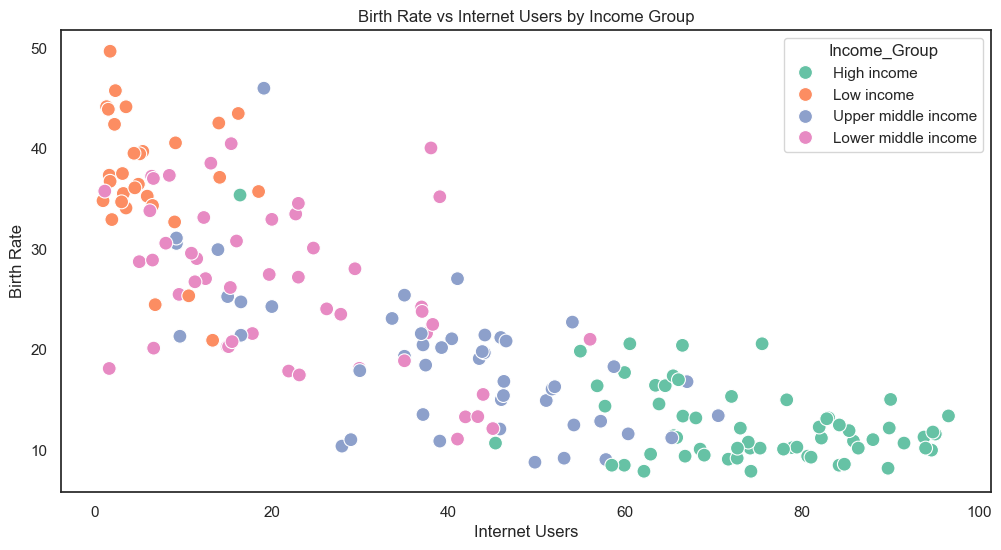

In [290]:
plt.figure(figsize=(12, 6))

# Scatter plot with different colors
sns.scatterplot(x='Internet_users', y='Birth_rate', hue='Income_Group', data=final_df, palette='Set2', s=100) 


# Add labels and title
plt.xlabel("Internet Users")
plt.ylabel("Birth Rate")
plt.title("Birth Rate vs Internet Users by Income Group")

plt.show()
